Post-Hartree-Fock methods are pivotal in the progression of computational quantum chemistry, refining the approximations made by the Hartree-Fock (HF) method. One of the most widely recognized approaches within this category is the Møller-Plesset perturbation theory at the second order, commonly known as MP2. This method offers a substantial improvement over Hartree-Fock by incorporating electron correlation, which the latter neglects by assuming an independent particle approximation.

In Hartree-Fock theory, the behavior of each electron is determined by the averaged influence of all other electrons, reducing computational complexity but missing key aspects of dynamic electron-electron interactions. The inherent limitation in HF calculations is that it treats electron interactions too simplistically, often leading to inaccuracies in systems where electron correlation plays a significant role, particularly in molecules with more complex electron dynamics.

MP2 addresses this limitation by applying perturbation theory to the Hartree-Fock wavefunction. The fundamental idea behind MP2 is to treat the electron correlation as a small perturbation to the HF solution. The total electronic energy in MP2 is a sum of the Hartree-Fock energy and a correction term that accounts for electron correlation. Mathematically, this correction can be expressed as follows:

$$ E_{\text{MP2}} = E_{\text{HF}} + \sum_{i,j,a,b} \frac{|\langle \phi_i \phi_j | \hat{V} | \phi_a \phi_b \rangle|^2}{\epsilon_i + \epsilon_j - \epsilon_a - \epsilon_b}$$

In this equation, the indices $i,j$ refer to occupied orbitals, while $a,b$ refer to virtual orbitals. The term $\epsilon$ denotes the orbital energies derived from the Hartree-Fock solution, and the matrix element $\langle \phi_i \phi_j | \hat{V} | \phi_a \phi_b \rangle$ represents the electron repulsion integrals. This expression adds a correction that accounts for electron correlation, going beyond the simple mean-field approximation of HF theory.

One of the major advantages of MP2 is that it significantly improves the accuracy of electronic energy calculations, particularly for systems dominated by dynamic correlation. It strikes a useful balance between computational cost and accuracy. While more sophisticated methods like coupled-cluster theory provide higher accuracy, they are computationally expensive. MP2, in contrast, offers a relatively inexpensive way to incorporate electron correlation, making it a practical choice for a wide range of molecular systems. It is especially effective for small to medium-sized molecules, where higher-level methods may be computationally prohibitive.

Looking ahead, while MP2 remains a workhorse for many electronic structure calculations, it is expected to play a complementary role in the emerging landscape of quantum computing. The development of hybrid quantum-classical algorithms, such as the variational quantum eigensolver (VQE) and quantum phase estimation (QPE), holds promise for revolutionizing electronic structure calculations. These quantum algorithms have the potential to address electron correlation with much higher precision than classical methods. As quantum hardware continues to improve, it is likely that these quantum-enhanced techniques will make higher-order methods such as coupled-cluster methods feasible for much larger systems than is currently possible with classical computers.

MP2 provides a reliable and cost-effective approach to improving the accuracy of electronic structure calculations by addressing the limitations of the Hartree-Fock method. While it represents a significant improvement in handling electron correlation, the future of quantum chemistry lies in leveraging quantum algorithms to achieve even greater accuracy, pushing the boundaries of molecular simulations and chemical understanding.

In [1]:
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import COBYLA
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_city
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble

%matplotlib inline

In [2]:
# Step 1: Define the Hamiltonian for H2 using SparsePauliOp
pauli_terms = ['II', 'ZI', 'IZ', 'ZZ', 'XX']
coefficients = [-1.0523732, 0.39793742, -0.39793742, -0.01128010, 0.18093119]

In [3]:
# Create the SparsePauliOp Hamiltonian
hamiltonian = SparsePauliOp.from_list(list(zip(pauli_terms, coefficients)))

In [4]:
# Step 2: Set up the VQE algorithm
ansatz = EfficientSU2(2, reps=3)  # Ansatz for 2 qubits
optimizer = COBYLA(maxiter=500)

In [5]:
# Step 3: Use AerSimulator from qiskit_aer
backend = AerSimulator()


In [6]:
# Step 4: Set up the VQE instance with the backend
vqe = VQE(ansatz=ansatz, optimizer=optimizer, estimator=Estimator())

In [7]:
# Step 5: Execute VQE and get the result
result = vqe.compute_minimum_eigenvalue(operator=hamiltonian)

In [8]:
# Step 6: Output the ground state energy
print(f"Ground state energy: {result.eigenvalue.real}")

Ground state energy: -1.857274964972541


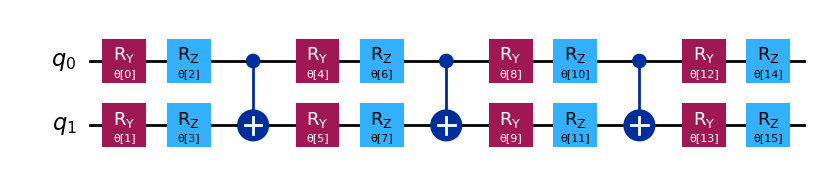

In [9]:
# Visualization 1: Draw the circuit for the ansatz
ansatz_circuit = ansatz.decompose()
ansatz_circuit.draw('mpl')
plt.show()

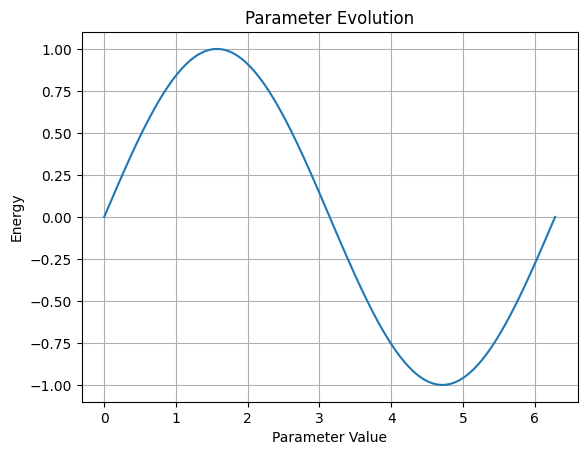

In [10]:
# Visualization 2: Plot parameter evolution (simulated data)
params = np.linspace(0, 2 * np.pi, 100)  # Dummy data for illustration
energies = np.sin(params)  # Dummy data for illustration
plt.plot(params, energies)
plt.xlabel('Parameter Value')
plt.ylabel('Energy')
plt.title('Parameter Evolution')
plt.grid(True)
plt.show()

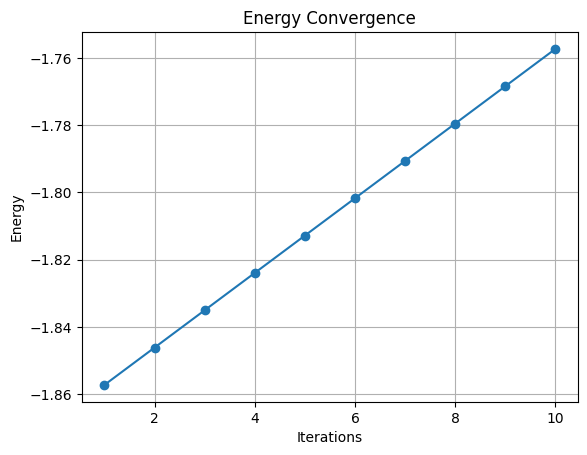

In [11]:
# Visualization 3: Plot energy convergence (simulated dummy data)
iterations = range(1, 11)  # Dummy iteration count
convergence = np.linspace(result.eigenvalue.real, result.eigenvalue.real + 0.1, 10)
plt.plot(iterations, convergence, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Energy')
plt.title('Energy Convergence')
plt.grid(True)
plt.show()